In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import math
from numpy import nanmean
import pandas as pd
from scipy import stats
import matplotlib.ticker as tk
import cooltools.lib.plotting
%matplotlib notebook
import warnings
warnings.filterwarnings('ignore')
import pyBigWig
import cooler
def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)
        
        
from cooltools.lib.numutils import adaptive_coarsegrain, interp_nan
from matplotlib.colors import LogNorm
import cooltools.lib.plotting

# to plot ticks in terms of megabases we use the EngFormatter
# https://matplotlib.org/gallery/api/engineering_formatter.html
from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b')
import pandas as pd
from scipy.signal import find_peaks
# import libraries for biological data analysis
from coolpuppy import coolpup
from coolpuppy.lib import numutils
from coolpuppy.lib.puputils import divide_pups
from coolpuppy import plotpup
import cooler
import bioframe
import cooltools
from cooltools import expected_cis, expected_trans
from cooltools.lib import plotting


## Origins analysis 

In [3]:
#Load IPLS signal, one copy can be found in LatticePoly/LatticePoly/
dir_IPLS="/home/admindario/Desktop/backup_Settembre_22_di_ENS_folder/ENS/PhD_data/JM_data_yeast/"
sim =  pd.read_csv(dir_IPLS+"/global_profiles.csv")
all_origins=sim
#Extract peaks (corresponding to origins)
peaks=find_peaks(all_origins["signal"],distance=int(5))
mask=np.zeros(len(sim["signal"]))
mask[peaks[0]] = 1
all_origins["is_origin"]=mask
#Build a dataframe with all the origins, load MicroC data for correct chromsome names (roman numbers)
dir_coolers="/home/admindario/Desktop/backup_Settembre_22_di_ENS_folder/ENS/PhD_data/"
clr = cooler.Cooler(dir_coolers+'/GSM4585143_23C-15min.mcool::/resolutions/200')
view_df=pd.DataFrame({"chrom":clr.chromnames,"start":0,"end":clr.chromsizes.values,"name":clr.chromnames})

index=np.arange(0,17)
for i in range(len(all_origins["chrom"])):
    for ind in index:
        if(int(all_origins["chrom"].iloc[i][3:])==ind+1):
            all_origins["chrom"].iloc[i]=view_df["chrom"].iloc[ind]
            break
all_origins=all_origins.rename(columns={"chromStart":"start","chromEnd":"end"})

            
all_origins=all_origins.drop(all_origins[all_origins["is_origin"][:]==False].index)
all_origins=all_origins.drop(all_origins[all_origins["signal"][:]<0].index)

all_origins["mid"]=all_origins["end"]
all_origins["start"]=all_origins["start"]
all_origins["end"]=all_origins["end"]
all_origins["name"]="origin"
#all_origins=all_origins.reset_index(drop=True)

chrom=[]
start=[]
end=[]
signal=[]
mid=[]
dist_cen=[]
dist_tel=[]


centromeres=[151,239,114,450,152,149,497,106,356,436,440,151,268,629,327,556]

for i in range(0,len(all_origins["chrom"])):
    chrom.append(all_origins["chrom"].iloc[i])
    start.append(all_origins["start"].iloc[i])
    end.append(all_origins["end"].iloc[i])
    signal.append(all_origins["signal"].iloc[i])
    mid.append(all_origins["mid"].iloc[i])
    for j in range(len(centromeres)):
        if(all_origins["chrom"].iloc[i]==clr.chromnames[j]):
            dist_cen.append(abs(centromeres[j]*1000-all_origins["mid"].iloc[i]))
            if((view_df[view_df["chrom"]==clr.chromnames[j]]["end"]-all_origins["mid"].iloc[i]).iloc[0] > all_origins["mid"].iloc[i]):
                dist_tel.append(all_origins["mid"].iloc[i])
            else:
                dist_tel.append((view_df[view_df["chrom"]==clr.chromnames[j]]["end"]).iloc[0]-all_origins["mid"].iloc[i])
                
                

            


#Dataframe to use in the aggregate
all_sites=pd.DataFrame({"chrom":chrom,"start":start,"end":end,"mid":mid,"dist_cen":dist_cen,"dist_tel":dist_tel,"signal":signal})  

#Create a copy with the names compatible with HiC maps in HU arrested condition

chrom_hu=[]
for i in range(len(all_sites)):
    dir_coolers_hu="/home/admindario/Downloads"
    clrHIC = cooler.Cooler(dir_coolers_hu+"/GSM4946280_KJ22_scc2.cool")
    clrMicro= cooler.Cooler(dir_coolers+'/GSM4585143_23C-15min.mcool::/resolutions/200')
    for j in range(len(clrMicro.chromnames)):
        if(all_sites["chrom"][i]==clrMicro.chromnames[j]):
            chrom_hu.append(clrHIC.chromnames[j])
            
all_sites_hu=pd.DataFrame({"chrom":chrom_hu,"start":start,"end":end,"mid":mid,"dist_cen":dist_cen,"dist_tel":dist_tel,"signal":signal})

<IPython.core.display.Javascript object>


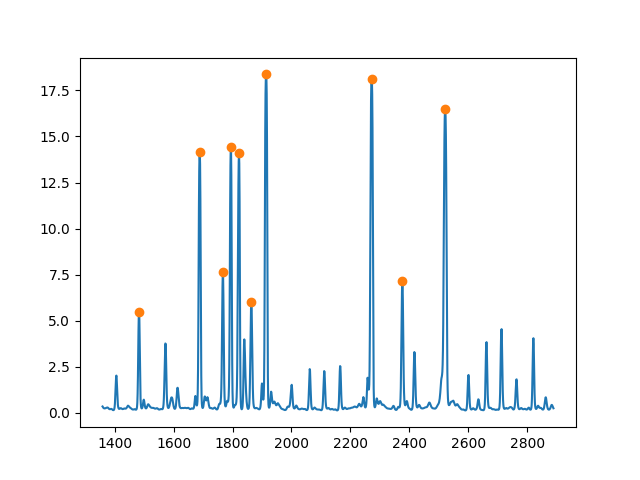

In [10]:

%matplotlib notebook

plt.plot(sim[sim["chrom"]=="chrIV"]["signal"])    
plt.plot(all_origins[(all_origins["chrom"]=="chrIV")*(all_origins["signal"]>5)]["signal"],"o")    

# Experimental Data

<IPython.core.display.Javascript object>


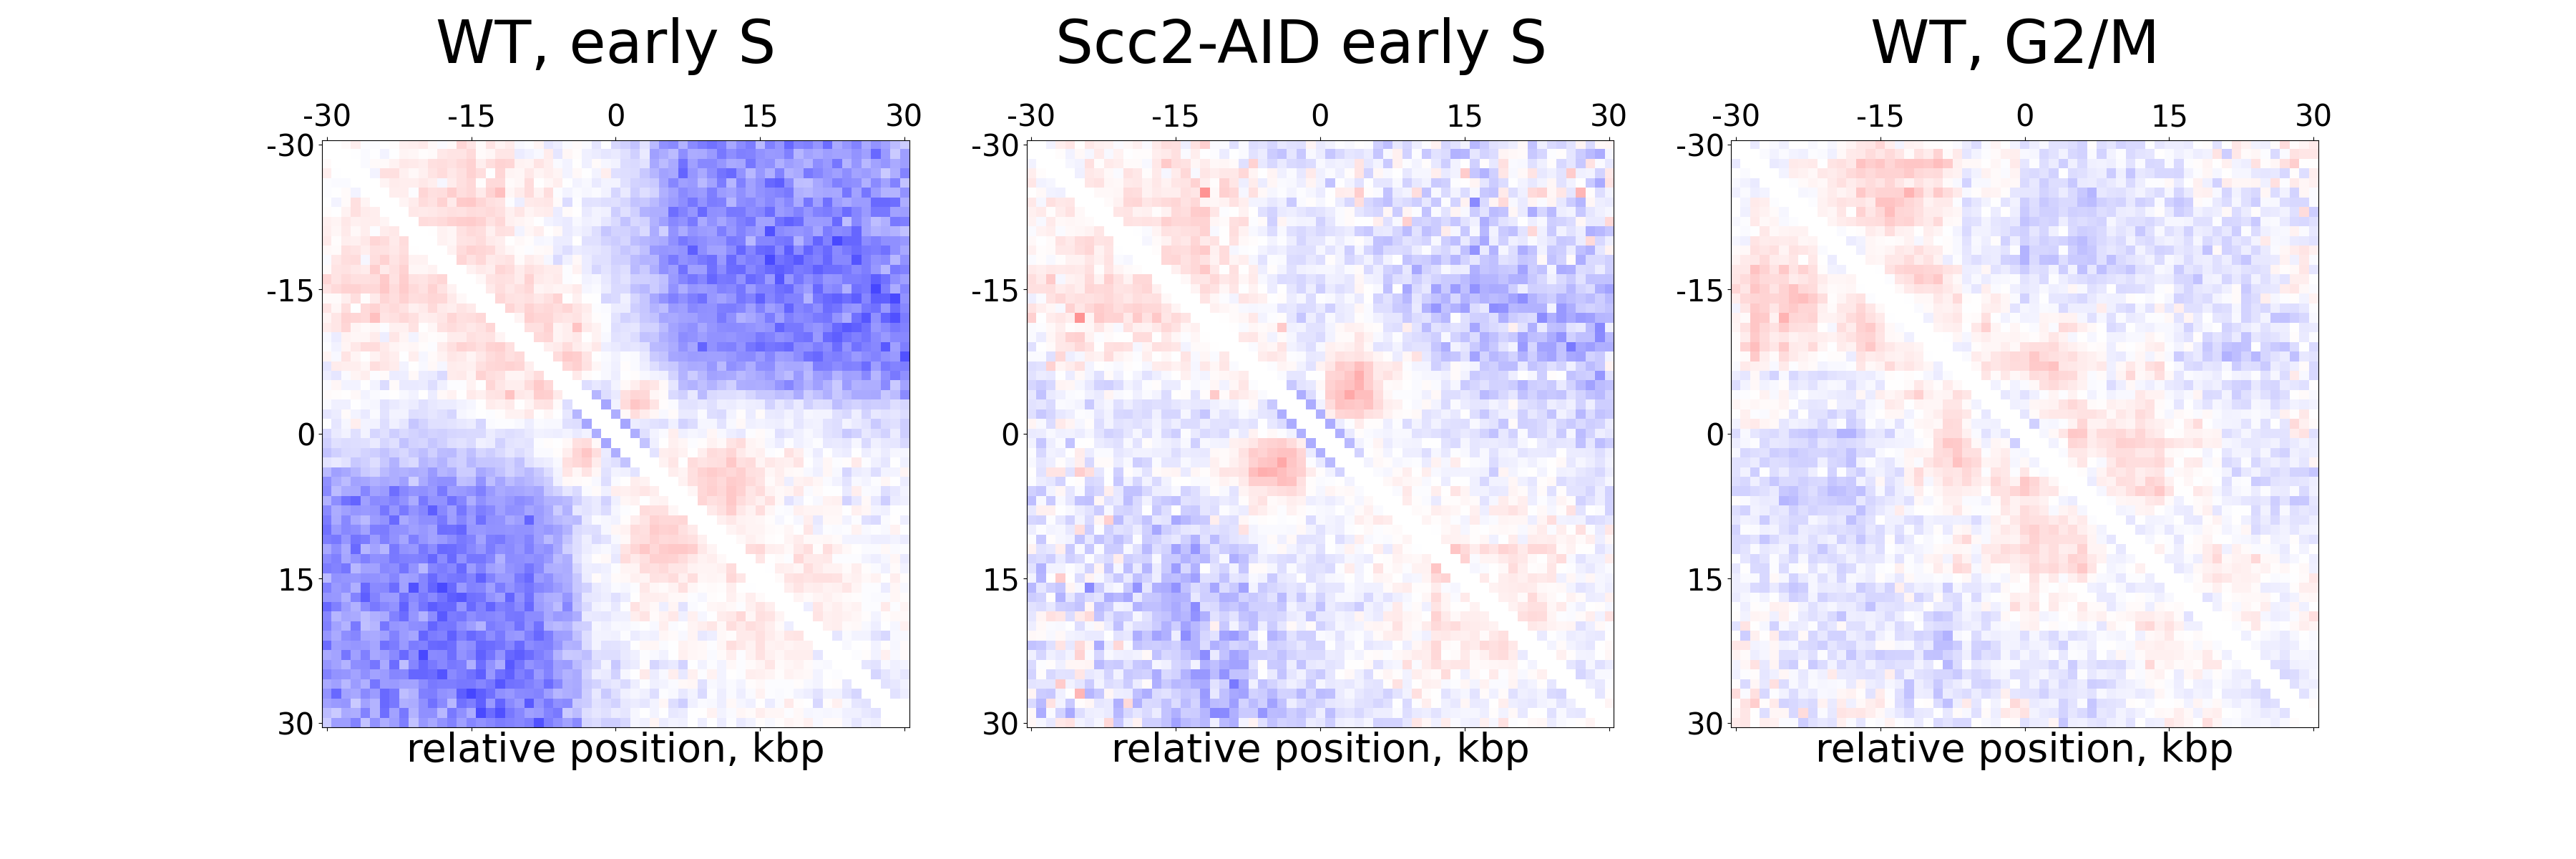

INFO:coolpuppy:('II', 'II'): 5
INFO:coolpuppy:('IV', 'IV'): 6
INFO:coolpuppy:('V', 'V'): 1
INFO:coolpuppy:('VII', 'VII'): 4
INFO:coolpuppy:('VIII', 'VIII'): 3
INFO:coolpuppy:('IX', 'IX'): 1
INFO:coolpuppy:('X', 'X'): 1
INFO:coolpuppy:('XI', 'XI'): 2
INFO:coolpuppy:('XII', 'XII'): 4
INFO:coolpuppy:('XIII', 'XIII'): 3
INFO:coolpuppy:('XIV', 'XIV'): 4
INFO:coolpuppy:('XV', 'XV'): 6
INFO:coolpuppy:('XVI', 'XVI'): 3
INFO:coolpuppy:Total number of piled up windows: 43
INFO:coolpuppy:('II', 'II'): 5
INFO:coolpuppy:('IV', 'IV'): 6
INFO:coolpuppy:('V', 'V'): 1
INFO:coolpuppy:('VII', 'VII'): 4
INFO:coolpuppy:('VIII', 'VIII'): 3
INFO:coolpuppy:('IX', 'IX'): 1
INFO:coolpuppy:('X', 'X'): 1
INFO:coolpuppy:('XI', 'XI'): 2
INFO:coolpuppy:('XII', 'XII'): 4
INFO:coolpuppy:('XIII', 'XIII'): 3
INFO:coolpuppy:('XIV', 'XIV'): 4
INFO:coolpuppy:('XV', 'XV'): 6
INFO:coolpuppy:('XVI', 'XVI'): 3
INFO:coolpuppy:Total number of piled up windows: 43
INFO:coolpuppy:('II', 'II'): 5
INFO:coolpuppy:('IV', 'IV'): 6
INFO

In [4]:
HiC_mtx=[]
HiC_expected=[]
labels=["WT, early S","Scc2-AID early S ","WT, G2/M"]
titles=["All origins","top 15% origins","late origins"]
dfs=[all_sites_hu,all_sites_hu[(all_sites_hu["signal"]>10)],all_sites_hu[(all_sites_hu["signal"]<2)]]
for e in range(1,len(dfs)-1):
    n_groups=len(labels)
    fig, axs = plt.subplots(1, n_groups, figsize=(12*n_groups, 12))
    #fig.suptitle(titles[e],size=40)
    directory=["GSM4946279_KJ20_WT.cool","GSM4946280_KJ22_scc2.cool","GSM4946266_KJ1_G2.cool"]
    for dire in range(0,len(directory)):
        resolution=1000
        flank=30_000
        sites_frame=dfs[e][(dfs[e]["dist_tel"]>flank)*(dfs[e]["start"]>flank)][:]

        clr = cooler.Cooler(dir_coolers_hu+"/"+directory[dire])
        if(np.sum(list(clr.bins().columns=="raw"))==0):
                with clr.open("r+") as f:
                    f["bins"].create_dataset("raw", data=np.ones(len(clr.bins()[:])), compression="gzip", compression_opts=6)
        view_df=pd.DataFrame({"chrom":clr.chromnames,"start":0,"end":clr.chromsizes.values,"name":clr.chromnames})
        expected = cooltools.expected_cis(clr, view_df=view_df,clr_weight_name="weight", nproc=2, chunksize=1_000_000)
        pup = coolpup.pileup(clr, sites_frame,clr_weight_name="weight", features_format='bed', expected_df=expected, view_df=view_df,flank=flank ,local=True)
        
        mtx=pup.loc[0, 'data']
        ax = axs[dire]
        im=ax.matshow(
            np.log2(mtx),
            vmax = 1,
            vmin = -1,
            cmap='bwr',
            interpolation='none')
        ticks_pixels = np.linspace(0, flank*2//resolution,5)
        ticks_kbp = ((ticks_pixels-ticks_pixels[-1]/2)*resolution//1000).astype(int)
        ax.set(
               xticks=ticks_pixels,
               xticklabels=ticks_kbp,
               yticks=ticks_pixels,
               yticklabels=ticks_kbp,
               xlabel='relative position, kbp')
        ax.xaxis.label.set_size(40)
        ax.set_title(f'{labels[dire]} ',size=60,pad=40)
        ax.xaxis.set_tick_params(labelsize=30)
        ax.yaxis.set_tick_params(labelsize=30)
        #ax.loglog(np.array(expected[expected["region1"]=="IV"]["dist"]),np.array(expected[expected["region1"]=="IV"]["balanced.avg"]))

<IPython.core.display.Javascript object>


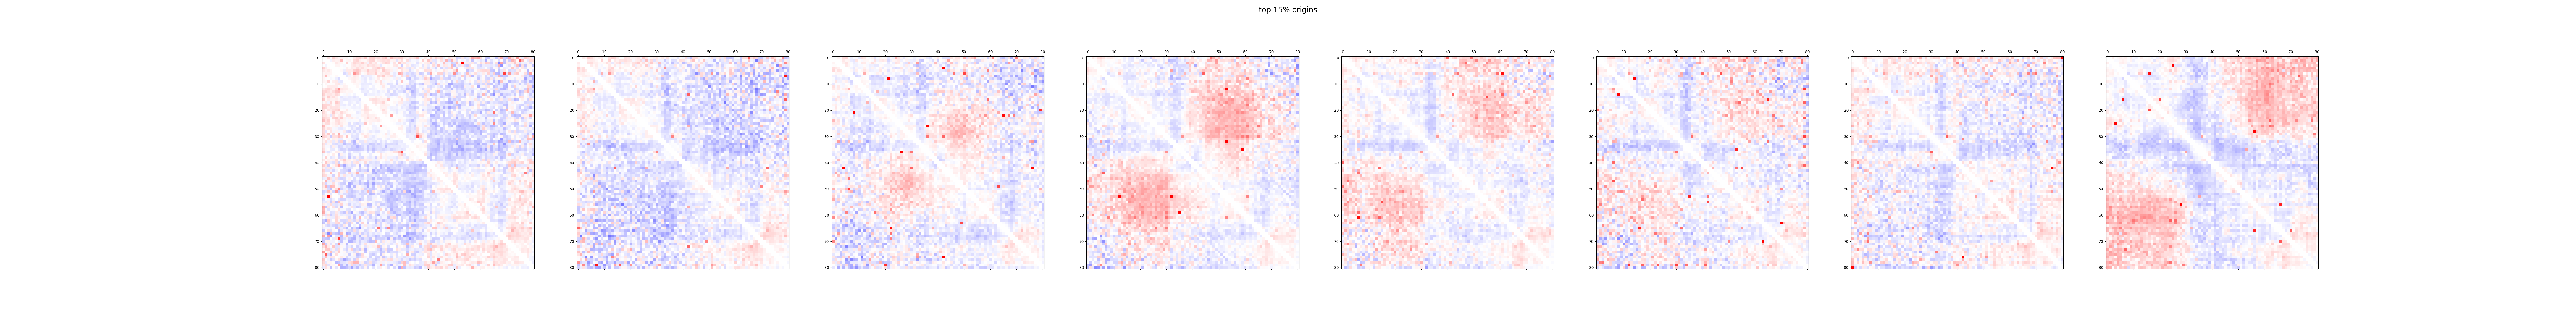

In [9]:
labels=["G1","G1/S","early S","late S","S/G2","G2","next G1","Arrested M "]
titles=["All origins","top 15% origins","worst 15% origins"]

dfs=[all_sites[(all_sites["signal"]>0)],all_sites[(all_sites["signal"]>5)]]
#dfs=[all_cars[all_cars["value"]>50]]
exp_mtx=[]
for e in range(1,len(dfs)):
    expected_MicroC=[]

    n_groups=len(labels)
    fig, axs = plt.subplots(1, n_groups, figsize=(12*n_groups, 12))
    fig.suptitle(titles[e],size=20)
    directory=["GSM4585143_23C-15min1kb.mcool","GSM4585144_23C-30min1kb.mcool","GSM4585145_23C-45min1kb.mcool","GSM4585146_23C-60min1kb.mcool","GSM4585147_23C-75min1kb.mcool","GSM4585148_23C-90min1kb.mcool","GSM4585149_23C-105min1kb.mcool","GSE151553_A364_merged1kb.mcool"]
    for dire in range(len(directory)):
        resolution=1000
        flank=40_000
       
       
        sites_frame=dfs[e][(dfs[e]["dist_tel"]>flank)*(dfs[e]["start"]>flank)*(dfs[e]["dist_cen"]>flank)]

        
        clr = cooler.Cooler(dir_coolers+"/"+directory[dire]+"::/resolutions/"+str(resolution))
        view_df=pd.DataFrame({"chrom":clr.chromnames,"start":0,"end":clr.chromsizes.values,"name":clr.chromnames})
        expected = cooltools.expected_cis(clr, view_df=view_df,clr_weight_name="weight", nproc=2, chunksize=1_000_000)
        expected['s_bp'] = expected['dist']* resolution
        expected['count.sum'].loc[expected['dist'] < 2] = np.nan
        region="chrIV"
        stack = cooltools.pileup(clr, sites_frame, clr_weight_name="weight",expected_df=expected,view_df=view_df, flank=flank)
        mtx = np.nanmean(stack, axis=2)
        ax = axs[dire]
        ax.matshow(
            np.log2(mtx),
            vmax = 1,
            vmin = -1,
            cmap='bwr',
            interpolation='none')